In [34]:
!pip install numpy
!pip install matplotlib
!pip install opencv-python

ERROR: Could not find a version that satisfies the requirement cv2
ERROR: No matching distribution found for cv2


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# to import a tiff use this


import cv2
filename = 'benoitdata/F20_10_b/6um_jamtveit_att_pag-1.99_3.12_00030.tif'

img = cv2.imread(filename,0)

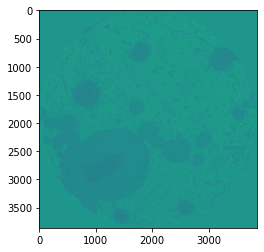

In [33]:
plt.imshow(img)

In [2]:
# import labeled data from JMs ML labeling system

# filename = '/media/sda/data/labeled/F20_10b/6um_jamtveit_att_pag-1.99_3.12_00030.tif_labeled.npy'
filename = '/media/sda/data/labeled/F20_10b/6um_jamtveit_att_pag-1.99_3.12_00513.tif_labeled.npy'

img =  np.load(filename)

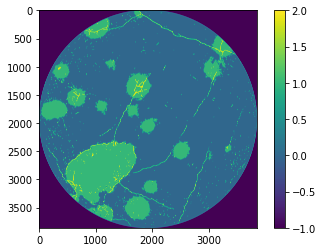

In [3]:
plt.imshow(img)
plt.colorbar()

In [4]:
np.unique(img)

array([-1.,  0.,  1.,  2.])

In [5]:
# make a copy to not destroy the original image
img_fracves = img.copy()

In [6]:
# set all values we dont care about to nans

img_fracves[img_fracves == -1] = np.nan
img_fracves[img_fracves == 0] = np.nan

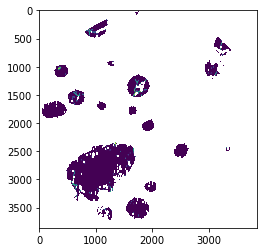

In [7]:
plt.imshow(img_fracves, interpolation=None)

In [8]:
# total_pixels = img_fracves.shape[0] * img_fracves.shape[1]

In [9]:
# calculate area of sample to make fractions

area_of_sample = np.pi * (img_fracves.shape[0]/2)**2

In [10]:
# calculate area of vesicles
(img_fracves[img_fracves == 1].sum())/area_of_sample

0.17545948842008507

In [11]:
# calculate area of fractures
(img_fracves[img_fracves == 2].sum()/2)/area_of_sample

0.023368732186760298

In [12]:
# filename = '/media/sda/data/labeled/F20_10b/6um_jamtveit_att_pag-1.99_3.12_00030.tif_labeled.npy'


In [13]:
# gets all file names in the path
all_labeled_data_paths = !ls /media/sda/data/labeled/F20_10b/*.npy

# to do this for tiffs do something like
# all_labeled_data_paths = !ls /mydirectoryofdata/*.tif

In [14]:
# all_labeled_data_paths[-10]

'/media/sda/data/labeled/F20_10b/6um_jamtveit_att_pag-1.99_3.12_00513.tif_labeled.npy'

In [15]:
# area_of_sample = np.pi * (img_fracves.shape[0]/2)**2

In [16]:
from multiprocessing import Pool


In [17]:
def volume_avg(filename):
    img = np.load(filename)
    img_fracves[img_fracves == -1] = np.nan
    img_fracves[img_fracves == 0] = np.nan
#     vesical_fraction = (img_fracves[img_fracves == 1].sum())/area_of_sample
#     fracture_fraction = (img_fracves[img_fracves == 2].sum()/2)/area_of_sample
    
    del img
#     return img_fracves, vesical_fraction, fracture_fraction
    return img_fracves

In [18]:
pool = Pool()

# applies function to all images for maximum processors on the machine
calculated_data = pool.map(volume_avg, all_labeled_data_paths)

pool.close()

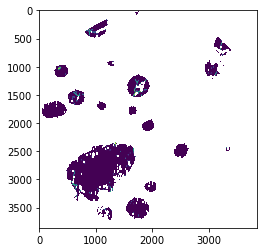

In [19]:
plt.imshow(calculated_data[0])
# plt.imshow(calculated_data[0][0])

In [20]:
len(all_labeled_data_paths)

523

In [21]:
# puts all the images into a single 3d matrix
img_3d = np.array(calculated_data)

# calculate volume of cylinder sample
volume_of_sample = len(all_labeled_data_paths) * np.pi*(img_fracves.shape[0]/2)**2

In [22]:
# calculate vesical volume fraction
vesical_3d_fraction = (img_3d[img_3d == 1].sum())/volume_of_sample

# calculate fracture volume fraction
fracture_3d_fraction = (img_3d[img_3d == 2].sum()/2)/volume_of_sample

In [23]:
# img_fracves[img_fracves == 1].sum()

In [24]:
vesical_3d_fraction

0.17545948842008507

In [25]:
fracture_3d_fraction

0.023368732186760298

In [26]:
# vesicals = []
# fractures = []
# imgs = []
# for img, ves, frac in calculated_data:
#     vesicals.append(ves)
#     fractures.append(frac)
#     imgs.append(imgs)
    
# print('vesical average area :', np.mean(vesicals))
# print('fracture average area :', np.mean(fractures))

In [27]:
# np.array(imgs)

In [28]:
# img

In [29]:
# vesicals